# Preparação do ambiente e carregamendo dos dados

In [199]:
# Carregamento dos pacotes que serão utilizados

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# Código de utilização no kaggle para upload dos dados
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/exoplanet-full-data-set-july-2022/dataset_exoplanets_29.07.2022_ready.csv
/kaggle/input/exoplanet-full-data-set-july-2022/dataset_exoplanets_29.07.2022_fullcopy.csv
/kaggle/input/exoplanet-full-data-set-july-2022/README.md
/kaggle/input/exoplanet-full-data-set-july-2022/Data columns in Kepler Objects of Interest Table.pdf


In [200]:
#carregamento do dataset completo
df_exoplanets_full = pd.read_csv('/kaggle/input/exoplanet-full-data-set-july-2022/dataset_exoplanets_29.07.2022_ready.csv')
print('Carregamento completo. O Shape do dataset completo é ' + str(df_exoplanets_full.shape))

Carregamento completo. O Shape do dataset completo é (9564, 141)


# Tratamento dos dados

#### Criação do dataset de dados - realizando o drop dos atributos que não serão utilizados no treinamento
#### Atributos retirados da tabela incluem valores de erros e datas irrelevantes

In [201]:

df_exoplanets_data = df_exoplanets_full.drop(['koi_pdisposition',
                                              'koi_vet_stat',
                                              'koi_vet_date',
                                              'koi_disp_prov',
                                              'koi_comment',
                                              'koi_period_err1',
                                              'koi_period_err2',
                                              'koi_time0bk',
                                              'koi_time0bk_err1',
                                              'koi_time0bk_err2',
                                              'koi_time0',
                                              'koi_time0_err1',
                                              'koi_time0_err2',
                                              'koi_eccen_err1',
                                              'koi_eccen_err2',
                                              'koi_longp_err1',
                                              'koi_longp_err2',
                                              'koi_impact_err1',
                                              'koi_impact_err2',
                                              'koi_duration_err1',
                                              'koi_duration_err2',
                                              'koi_ingress_err1',
                                              'koi_ingress_err2',
                                              'koi_depth_err1',
                                              'koi_depth_err2',
                                              'koi_ror_err1',
                                              'koi_ror_err2',
                                              'koi_srho_err1',
                                              'koi_srho_err2',
                                              'koi_fittype',
                                              'koi_prad_err1',
                                              'koi_prad_err2',
                                              'koi_sma_err1',
                                              'koi_sma_err2',
                                              'koi_incl_err1',
                                              'koi_incl_err2',
                                              'koi_teq_err1',
                                              'koi_teq_err2',
                                              'koi_insol',
                                              'koi_insol_err1',
                                              'koi_insol_err2',
                                              'koi_dor',
                                              'koi_dor_err1',
                                              'koi_dor_err2',
                                              'koi_limbdark_mod',
                                              'koi_parm_prov',
                                              'koi_tce_plnt_num',
                                              'koi_tce_delivname',
                                              'koi_quarters',
                                              'koi_bin_oedp_sig',
                                              'koi_trans_mod',
                                              'koi_model_dof',
                                              'koi_model_chisq',
                                              'koi_datalink_dvr',
                                              'koi_datalink_dvs',
                                              'koi_steff_err1',
                                              'koi_steff_err2',
                                              'koi_slogg_err1',
                                              'koi_slogg_err2',
                                              'koi_smet_err1',
                                              'koi_smet_err2',
                                              'koi_srad_err1',
                                              'koi_srad_err2',
                                              'koi_smass_err1',
                                              'koi_smass_err2',
                                              'koi_sage_err1',
                                              'koi_sage_err2',
                                              'koi_sparprov',
                                              'koi_fwm_stat_sig',
                                              'koi_fwm_sra',
                                              'koi_fwm_sra_err',
                                              'koi_fwm_sdec',
                                              'koi_fwm_sdec_err',
                                              'koi_fwm_srao',
                                              'koi_fwm_srao_err',
                                              'koi_fwm_sdeco',
                                              'koi_fwm_sdeco_err',
                                              'koi_fwm_prao',
                                              'koi_fwm_prao_err',
                                              'koi_fwm_pdeco',
                                              'koi_fwm_pdeco_err',
                                              'koi_dicco_mra',
                                              'koi_dicco_mra_err',
                                              'koi_dicco_mdec',
                                              'koi_dicco_mdec_err',
                                              'koi_dicco_msky',
                                              'koi_dicco_msky_err',
                                              'koi_dikco_mra',
                                              'koi_dikco_mra_err',
                                              'koi_dikco_mdec',
                                              'koi_dikco_mdec_err',
                                              'koi_dikco_msky',
                                              'koi_dikco_msky_err'
                                             ],axis=1)

print('O shape do dataset é ' + str(df_exoplanets_data.shape))
print('Total de colunas excluídas foi ' + str(df_exoplanets_full.shape[1]-df_exoplanets_data.shape[1]))

O shape do dataset é (9564, 48)
Total de colunas excluídas foi 93



### O atributo koi_disposition é o target
#### Ele apresenta 3 possibilidades: FALSE POSITIVE, CONFIRMED e CANDIDATE. 
- FALSE POSITIVE - Confirmado por outros métodos que 
- CONFIRMED - Confirmado como exoplaneta
- CANDIDATE - Ainda em avaliação

#### A base será separada em dois conjuntos:
- FALSE POSITIVE + CONFIRMED
- CANDIDATE

#### A primeira base será utilizada para treinamento e teste e, em um segundo momento, a base de candidatos poderá ser utlizada para verificação de quais objetos de interesse seriam confirmados como planetas utilizando o modelo

In [202]:
df_exoplanets_candidates = df_exoplanets_data.loc[df_exoplanets_data['koi_disposition']=='CANDIDATE']
df_exoplanets = df_exoplanets_data.loc[df_exoplanets_data['koi_disposition']!='CANDIDATE']



#### O DataFrame df_exoplanets será utilizado para treinamento e teste
##### Serão retiradas colunas que não interessam para o treinamento deixando apenas os alvos e os dados

In [203]:
df_exoplanets = df_exoplanets.drop(['rowid',
                                    'kepid',
                                    'kepoi_name',
                                    'kepler_name',
                                    'koi_score'
                                    ],axis=1)

#### Necessário preencher os valores Nulos no atributos ou verificar se existe relevancia nele.
##### De 42 atributos apenas 9 estão com todos os valores completos


In [204]:
df_exoplanets.isna().any()

koi_disposition     False
koi_fpflag_nt       False
koi_fpflag_ss       False
koi_fpflag_co       False
koi_fpflag_ec       False
koi_period          False
koi_eccen            True
koi_longp            True
koi_impact           True
koi_duration        False
koi_ingress          True
koi_depth            True
koi_ror              True
koi_srho             True
koi_prad             True
koi_sma              True
koi_incl             True
koi_teq              True
koi_ldm_coeff4       True
koi_ldm_coeff3       True
koi_ldm_coeff2       True
koi_ldm_coeff1       True
koi_max_sngle_ev     True
koi_max_mult_ev      True
koi_model_snr        True
koi_count           False
koi_num_transits     True
koi_steff            True
koi_slogg            True
koi_smet             True
koi_srad             True
koi_smass            True
koi_sage             True
ra                  False
dec                 False
koi_kepmag           True
koi_gmag             True
koi_rmag             True
koi_imag    

#### Atributo koi_eccen
#### Coluna apenas com zeros - retirada do modelo

In [205]:
print(df_exoplanets.koi_eccen.describe())
df_exoplanets = df_exoplanets.drop(['koi_eccen'],axis=1)

count    7250.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: koi_eccen, dtype: float64


#### Atributo koi_longp
#### Coluna apenas com valores nulos - retirada do modelo

In [206]:
print(df_exoplanets.koi_longp.describe())
df_exoplanets = df_exoplanets.drop(['koi_longp'],axis=1)

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: koi_longp, dtype: float64


#### Atributo koi_impact
#### Atributos com valores Outliers - Necessário tratamento

In [207]:
print(df_exoplanets.koi_impact.describe())
df_exoplanets.koi_impact.isna().any()
#df_exoplanets.koi_impact.plot(kind="box")
#plt.show()

count    7250.000000
mean        0.758169
std         3.212828
min         0.000000
25%         0.227000
50%         0.586000
75%         0.917675
max       100.806000
Name: koi_impact, dtype: float64


True

#### Atributo koi_ingress
#### Coluna apenas com valores nulos - retirada do modelo

In [208]:
print(df_exoplanets.koi_ingress.describe())
df_exoplanets = df_exoplanets.drop(['koi_ingress'],axis=1)

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: koi_ingress, dtype: float64


#### Atributo koi_depth
#### Atributos com valores Outliers - Necessário tratamento

True
count    7.250000e+03
mean     2.983129e+04
std      9.159879e+04
min      8.000000e-01
25%      1.826500e+02
50%      5.029500e+02
75%      2.380600e+03
max      1.541400e+06
Name: koi_depth, dtype: float64


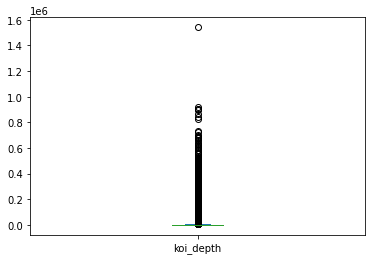

In [209]:
print(df_exoplanets.koi_depth.isna().any())
print(df_exoplanets.koi_depth.describe())
df_exoplanets.koi_depth.plot(kind='box')
plt.show()

#### Atributo koi_ror
#### Atributos com valores Outliers - Necessário tratamento

<AxesSubplot:>

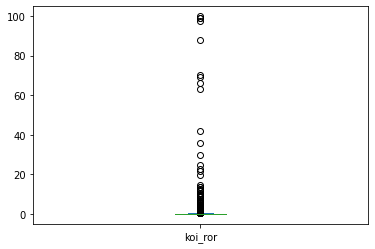

In [210]:
df_exoplanets.koi_ror.describe()
df_exoplanets.koi_ror.plot(kind='box')

#### Atributo koi_srho
#### Atributos com valores Outliers - Necessário tratamento

<AxesSubplot:>

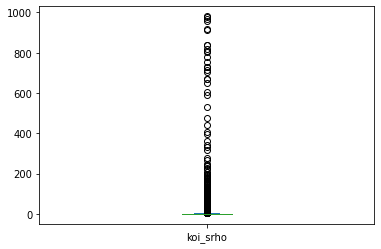

In [211]:
df_exoplanets.koi_srho.describe()
df_exoplanets.koi_srho.plot(kind='box')

#### Atributo koi_prad
#### Atributos com valores Outliers - Necessário tratamento

<AxesSubplot:>

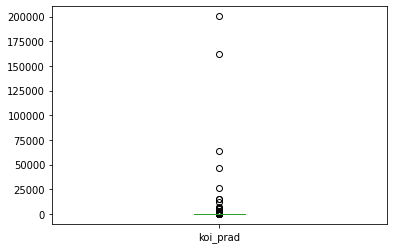

In [212]:
df_exoplanets.koi_prad.describe()
df_exoplanets.koi_prad.plot(kind='box')

#### Atributo koi_sma
#### Atributo corrigido inserindo valor médio nas colunas nulas

In [213]:
print(df_exoplanets.koi_sma.isna().any())
#df_exoplanets.koi_sma.describe()
#df_exoplanets.koi_sma.hist()
df_exoplanets.koi_sma.fillna(df_exoplanets.koi_sma.mean(), inplace=True)
print(df_exoplanets.koi_sma.isna().any())

True
False


In [214]:
df_exoplanets.isna().any()

koi_disposition     False
koi_fpflag_nt       False
koi_fpflag_ss       False
koi_fpflag_co       False
koi_fpflag_ec       False
koi_period          False
koi_impact           True
koi_duration        False
koi_depth            True
koi_ror              True
koi_srho             True
koi_prad             True
koi_sma             False
koi_incl             True
koi_teq              True
koi_ldm_coeff4       True
koi_ldm_coeff3       True
koi_ldm_coeff2       True
koi_ldm_coeff1       True
koi_max_sngle_ev     True
koi_max_mult_ev      True
koi_model_snr        True
koi_count           False
koi_num_transits     True
koi_steff            True
koi_slogg            True
koi_smet             True
koi_srad             True
koi_smass            True
koi_sage             True
ra                  False
dec                 False
koi_kepmag           True
koi_gmag             True
koi_rmag             True
koi_imag             True
koi_zmag             True
koi_jmag             True
koi_hmag    

#### Verificando os tipos de dados dentro do dataframe temos somente o atributo Alvo como categórico
#### É necessário alterar os valores de falso positivo e confirmado para 0 e 1 respectivamente 

In [215]:
df_exoplanets.koi_disposition

0            CONFIRMED
1            CONFIRMED
3       FALSE POSITIVE
4            CONFIRMED
5            CONFIRMED
             ...      
9557    FALSE POSITIVE
9558    FALSE POSITIVE
9559    FALSE POSITIVE
9561    FALSE POSITIVE
9563    FALSE POSITIVE
Name: koi_disposition, Length: 7508, dtype: object

In [216]:
le = preprocessing.LabelEncoder()
le.fit(df_exoplanets.koi_disposition)

y = le.transform(df_exoplanets.koi_disposition)

X = df_exoplanets.iloc[:,1:(df_exoplanets.shape[1])]


In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [218]:
exoplanets_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
exoplanets_tree = exoplanets_tree.fit(X_train, y_train)
print("Acurácia (base de treinamento):", exoplanets_tree.score(X_train, y_train))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').